In [37]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import nnls 
from matplotlib import pyplot as plt

In [38]:
 
path=f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"  
Protiens=np.unique([x.replace('__','').replace('.csv','') for x in os.listdir(path) if ("_MOUSE.csv" in x)])
times=[1,2,3,6,7,9,13,16,21,24,31] 

In [43]:
res=[]
fdata=pd.DataFrame()

for time in times[3:-1]:
    print(f"<============================= Time = {time} =============================>")
    for protien in Protiens:
        try:
            data=pd.read_csv(path+f"__{protien}.csv")
            data=data[data.exp_Time==time]        
#             data=data[data.new_RMSE.astype('float')<0.005]
            fdata=pd.concat([fdata,data[data.exp_Time==time].reset_index(drop="True")])
        except:
            continue

<============================= Time = 6 =============================>
<============================= Time = 7 =============================>
<============================= Time = 9 =============================>
<============================= Time = 13 =============================>
<============================= Time = 16 =============================>
<============================= Time = 21 =============================>
<============================= Time = 24 =============================>


In [44]:
fdata["len_seq"]=[len(x) for x in fdata.Peptied]
fdata=fdata[fdata["NEH_new"]!='∞']
fdata["dif"]=abs(fdata["NEH"]-fdata["NEH_new"].astype('float'))
# fdata=fdata[(fdata["NEH_new"].astype('float')<30) & (fdata["NEH_new"].astype('float')>10)]
# # fdata.drop(columns=["NEH"])

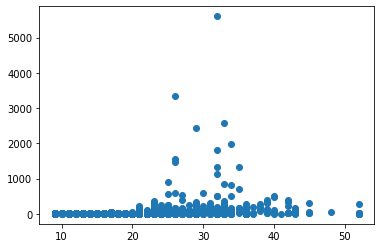

In [45]:
plt.scatter(fdata.NEH,fdata.dif)